In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.integrate import quad
from scipy.signal import detrend, hilbert , butter , freqs
from scipy import signal
from scipy.fft import fft, fftfreq , ifft

## 1. Amplitude Modulation

#### 1.1

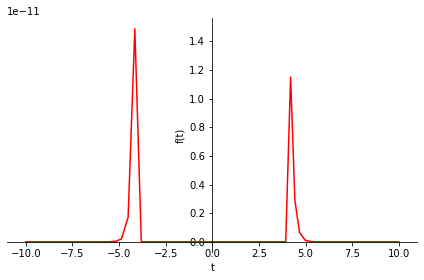

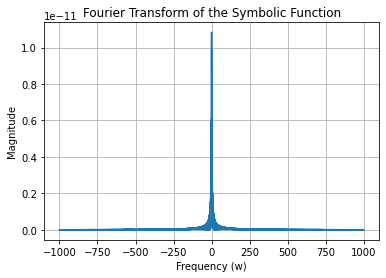

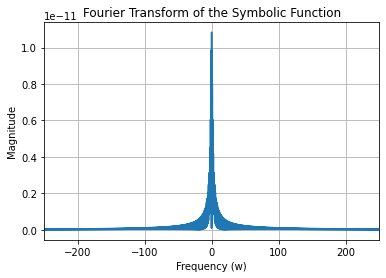

In [8]:
t,w = sp.symbols('t w')
m = sp.exp(-6*t)*(sp.Heaviside(t-4) - sp.Heaviside(t-8)) + sp.exp(6*t)*(sp.Heaviside(-t-4) - sp.Heaviside(-t-8))
sp.plot(m, line_color='red')
M = sp.fourier_transform(m, t, w)
M_np = sp.lambdify(w, M, modules=['numpy'])
w_vals = np.linspace(-1000, 1000, 10000) 
M_vals = M_np(w_vals)
plt.plot(w_vals, np.abs(M_vals))
plt.xlabel('Frequency (w)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of the Symbolic Function')
plt.grid(True)
plt.show()
plt.plot(w_vals, np.abs(M_vals))
plt.xlabel('Frequency (w)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of the Symbolic Function')
plt.grid(True)
plt.xlim(-250 , 250)
plt.show()

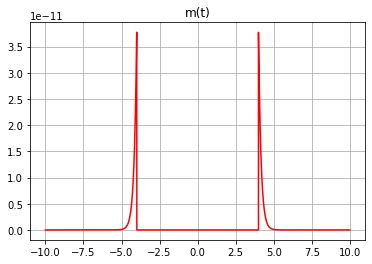

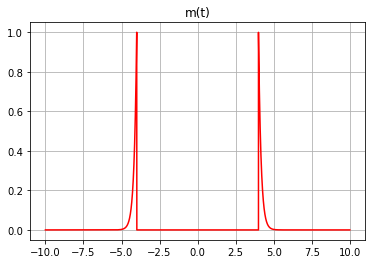

In [9]:
fs = 10000
ts = 1/fs
t1 = np.arange(-10,10,ts)
m = np.exp(-6*t1)*(np.heaviside(t1-4,1) - np.heaviside(t1-8,1)) + np.exp(6*t1)*(np.heaviside(-t1-4,1) - np.heaviside(-t1-8,1))
#normalized m
m_1 = m/np.max(m)
plt.plot(t1, m, color='red')


plt.title('m(t)')
plt.grid()
plt.show()

plt.plot(t1, m_1, color='red')
plt.title('m(t)')
plt.grid()
plt.show()

(-100.0, 100.0)

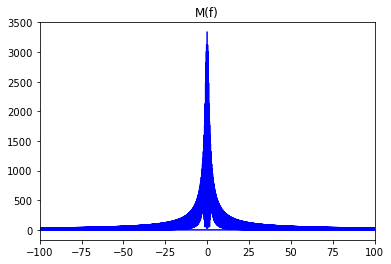

In [10]:
# Number of samples in normalized_tone
N = fs * 20
N = int(N)

M = fft(m_1)
frq = fftfreq(N, 1 / fs)

plt.plot(frq, np.abs(M) , color = 'blue')
plt.title('M(f)')
plt.xlim(-100 , 100)

#### 1.2

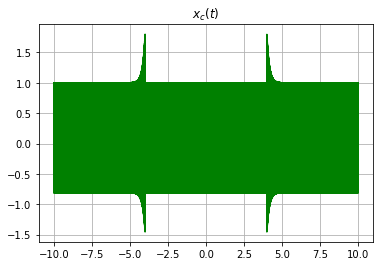

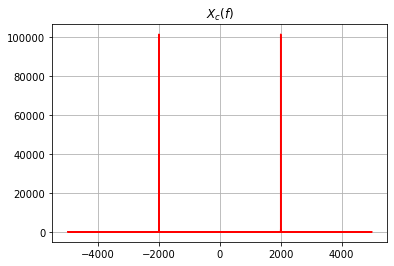

In [11]:
Ac = 1
mu = 0.8
fc = 2000
xc = Ac * (1 +  mu*m_1) * np.cos(2 * np.pi * fc * t1)
Xc = fft(xc)

plt.plot(t1 , xc , color='green')
plt.grid()
#plt.xlim(4 , 4.1)
plt.title('$x_c(t)$')
plt.show()

plt.plot(frq , np.abs(Xc) , color='red')
plt.grid()
plt.title('$X_c(f)$')

plt.show()

#### 1.4

200000
[0.]


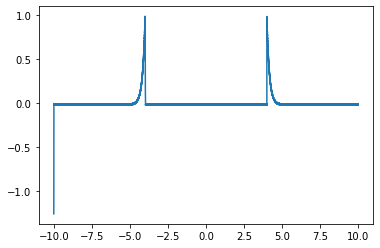

In [12]:
def AM_Envelope(R , C , fs , vin):
    output = np.zeros([len(vin), 1])
    print(output[1])
    for t in range(2 , len(vin)):
        if output[t - 1] < vin[t]:
            output[t] = vin[t]
        else:
            output[t] = output[t-1]*np.exp(-1/(fs*R*C))
    return output
R = 950 
C = 40 *(1e-6)
print(len(xc))
push = AM_Envelope(R, C, fs, xc)
mhat_2 = push - np.mean(push)
mhat_2 = mhat_2/mu;
plt.plot(t1 , mhat_2)
plt.show()



#### 1.5

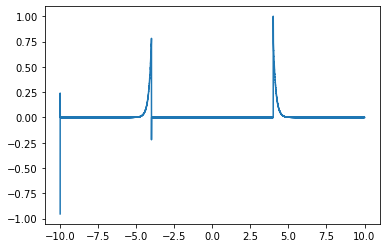

In [47]:
z = xc * np.cos(2 * np.pi * fc * t1)

sos = signal.butter(10, 3000, 'low', fs=10000, output='sos')
m_hat1 = signal.sosfilt(sos, z)
m_hat1 = m_hat1 - Ac/2
m_hat1 = m_hat1/np.max(m_hat1)
plt.plot(t1 , m_hat1)
plt.show()

#### 1.7

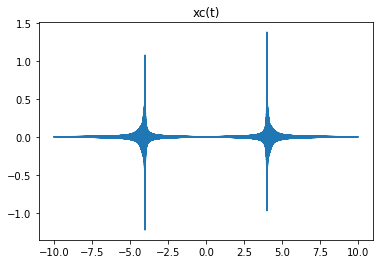

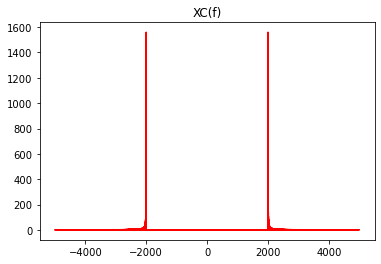

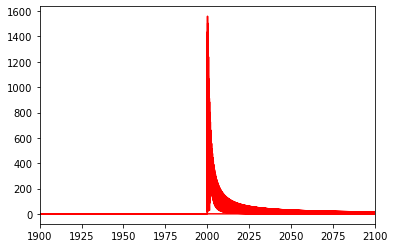

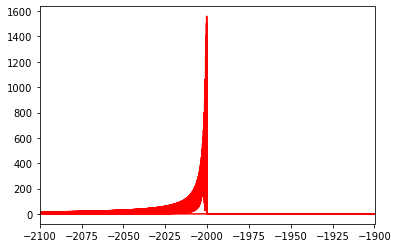

In [38]:
m_hil = hilbert(m_1)
mhil_1 = np.imag(m_hil)
xc_ussb = (Ac/2)*m_1*np.cos(2*np.pi*fc*t1) - (Ac/2)*mhil_1*np.sin(2*np.pi*fc*t1)
XC_ussb = fft(xc_ussb)
plt.plot(t1 , xc_ussb)
plt.title('xc(t)')
plt.show()
plt.plot(frq , np.abs(XC_ussb) , color = 'red')
plt.title('XC(f)')
plt.show()

plt.plot(frq , np.abs(XC_ussb) , color = 'red')
plt.xlim(1900 , 2100)
plt.show()
plt.plot(frq , np.abs(XC_ussb) , color = 'red')
plt.xlim(-2100 , -1900)
plt.show()


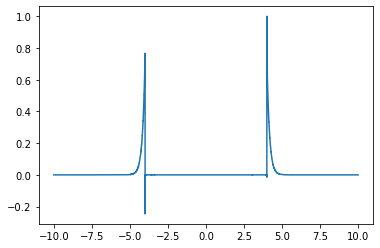

In [46]:
#demodulate
z2 = xc_ussb * np.cos(2 * np.pi * fc * t1)

sos = signal.butter(10, 3000, 'low', fs=10000, output='sos')
m_hat3 = signal.sosfilt(sos, z2)
m_hat3 = m_hat3/np.max(m_hat3)
plt.plot(t1 , m_hat3)
plt.show()

#### 1.8

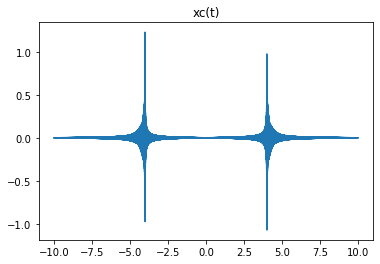

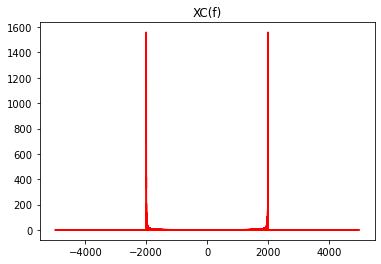

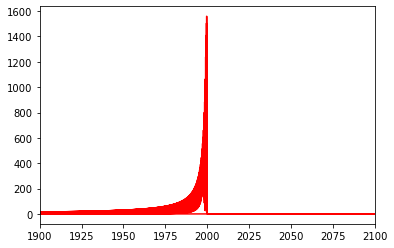

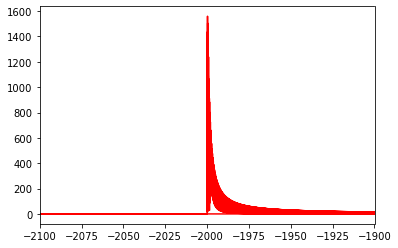

In [41]:
m_hil = hilbert(m_1)
mhil_1 = np.imag(m_hil)
xc_lssb = (Ac/2)*m_1*np.cos(2*np.pi*fc*t1) + (Ac/2)*mhil_1*np.sin(2*np.pi*fc*t1)
XC_lssb = fft(xc_lssb)
plt.plot(t1 , xc_lssb)
plt.title('xc(t)')
plt.show()
plt.plot(frq , np.abs(XC_lssb) , color = 'red')
plt.title('XC(f)')
plt.show()

plt.plot(frq , np.abs(XC_lssb) , color = 'red')
plt.xlim(1900 , 2100)
plt.show()
plt.plot(frq , np.abs(XC_lssb) , color = 'red')
plt.xlim(-2100 , -1900)
plt.show()

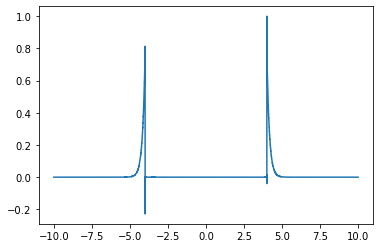

In [45]:
#demodulate
z3 = xc_lssb * np.cos(2 * np.pi * fc * t1)

sos = signal.butter(10, 3000, 'low', fs=10000, output='sos')
m_hat4 = signal.sosfilt(sos, z3)
m_hat4 = m_hat4/np.max(m_hat4)
plt.plot(t1 , m_hat4)
plt.show()

#### 1.9

## 2. Frequency Modulation

#### 2.1

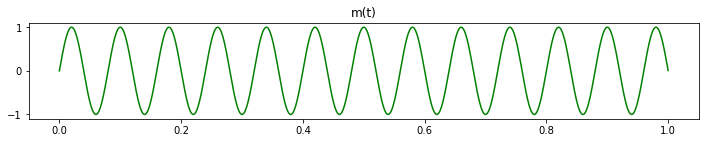

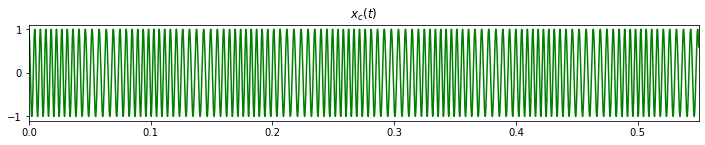

In [17]:
fs = 10000
ts = 1/fs
t = np.arange(0,1,ts)
m = np.sin(25*np.pi*t)

Ac = 1 
fc = 200 
fdelta = 30

fm = fc + fdelta*m

phase = 2*np.pi*np.cumsum(fm)/fs

xc = Ac * np.cos(phase)
plt.figure(figsize=(12,6)) 
plt.subplot(3 , 1, 1)
plt.plot(t, m, color='green')
plt.title('m(t)')
plt.show()
plt.figure(figsize=(12,6))
plt.subplot(3 , 1 , 2)
plt.plot(t, xc, color='green')
plt.title('$x_c(t)$')
plt.xlim(0, 0.55)
plt.show()

#### 2.2

(-1.2, 1.2)

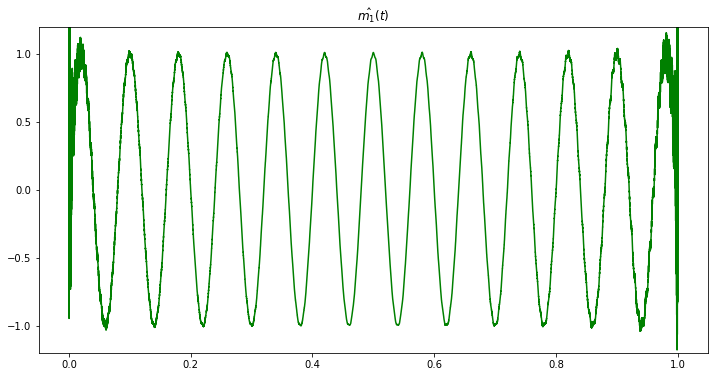

In [18]:
detrended = detrend(xc)
analytic_signal = hilbert(detrended)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase)/(2*np.pi)*fs
plt.figure(figsize=(12,6))
plt.plot(t[1:] , (instantaneous_frequency - fc)/fdelta, color='green')
plt.title('$\hat{m_1}(t)$')
plt.ylim(-1.2 , 1.2)

#### 2.3

[0.]


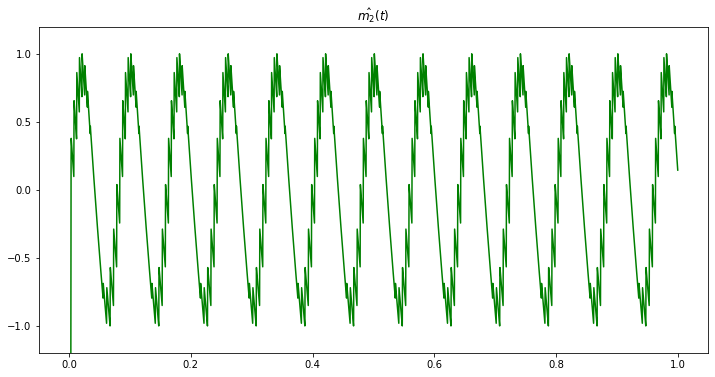

In [19]:
xd = -Ac*((2 * np.pi * fc ) + (2 * np.pi * fdelta * m)) * np.sin(phase)
R = 1800
C = 50 *(1e-6)
mhat2 = AM_Envelope(R , C , fs , xd)
mhat2 = mhat2 - np.mean(mhat2)
mhat2 = mhat2/np.max(mhat2)
plt.figure(figsize=(12,6))
plt.plot(t , mhat2 , color = 'green')
plt.ylim(-1.2 , 1.2)
plt.title('$\hat{m_2}(t)$')
plt.show()

#### 2.4

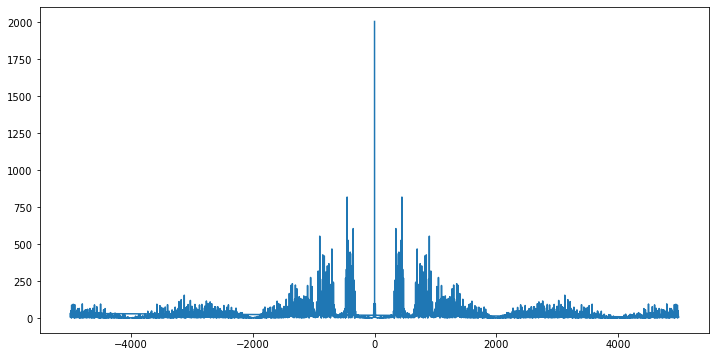

In [21]:
import numpy as np

zc = np.where(np.abs(np.diff(np.sign(xc))) != 0)[0]
gen_pulse = np.zeros(len(xc))
for i in range(len(zc)):
    gen_pulse[zc[i]:zc[i]+5] = 1

N = fs * 1
N = int(N)

Gen_Pulse = fft(gen_pulse)
freq = fftfreq(N, 1 / fs)
plt.figure(figsize=(12,6))
plt.plot(freq , np.abs(Gen_Pulse))
plt.show()

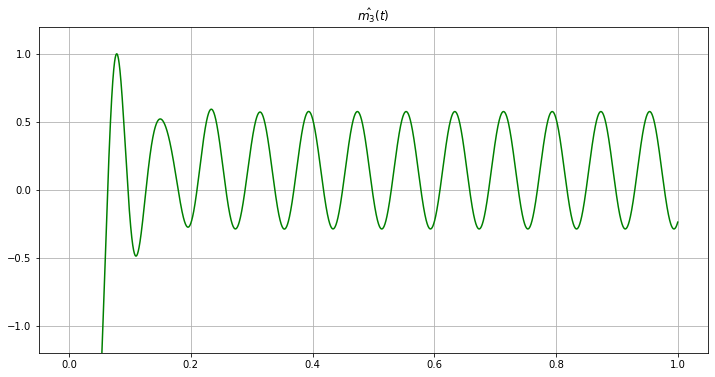

In [22]:
sos = signal.butter(10, 20, 'low', fs=10000, output='sos')
filtered_1 = signal.sosfilt(sos, gen_pulse)
mhat3 = filtered_1 - np.mean(filtered_1)
mhat3 = mhat3/np.max(mhat3)

plt.figure(figsize=(12,6))
plt.plot(t , mhat3 , color = 'green')
plt.grid()
plt.ylim(-1.2 , 1.2)
plt.title('$\hat{m_3}(t)$')
plt.show()

#### 2.5

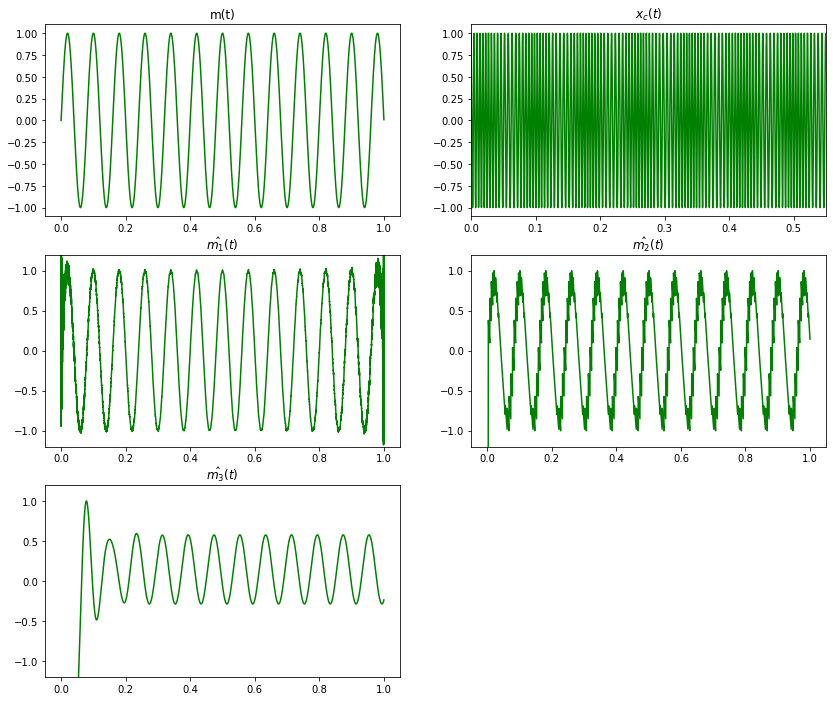

In [23]:
f = plt.figure() 
f.set_figwidth(14) 
f.set_figheight(12)
plt.subplot(3 , 2 , 1)
plt.plot(t, m, color='green')
plt.title('m(t)')
plt.subplot(3 , 2 , 2)
plt.plot(t, xc, color='green')
plt.title('$x_c(t)$')
plt.xlim(0, 0.55)
plt.subplot(3 , 2 , 3)
plt.plot(t[1:] , (instantaneous_frequency - fc)/fdelta, color='green')
plt.title('$\hat{m_1}(t)$')
plt.ylim(-1.2 , 1.2)
plt.subplot(3 , 2 , 4)
plt.plot(t , mhat2 , color = 'green')
plt.ylim(-1.2 , 1.2)
plt.title('$\hat{m_2}(t)$')
plt.subplot(3 , 2 , 5)
plt.plot(t , mhat3  , color = 'green')
plt.ylim(-1.2 , 1.2)
plt.title('$\hat{m_3}(t)$')
plt.show()